In [27]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Load NIAID queries

queries_df = pd.read_csv('./niaid_queries_revisited.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [29]:
# Drop combination column

queries_df = queries_df.drop('combination', axis = 1).copy()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3995,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [30]:
# Drop duplicates

queries_df = queries_df.drop_duplicates()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3917,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3924,hiv,DRYAD_doi.org:10.5061:dryad.wpzgmsbnz
3936,hiv,DRYAD_doi.org:10.5061:dryad.np5hqbzx5
3968,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df


In [31]:
# Load ranked analysis

ranked_df = pd.read_csv('./ranked_analysis_scopes.csv', sep=',')
ranked_df

,scope,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [32]:
# Use shorter names for columns

ranked_df.rename(columns = {'original query': 'original', 'combi 1': 'c1', 'combi 2': 'c2', 'combi 3': 'c3',
                            'combi 4': 'c4', 'combi 5': 'c5', 'combi 6': 'c6', 'combi 7': 'c7', 
                            'combi 8': 'c8', 'combi 9': 'c9', 'combi 10': 'c10', 'combi 11': 'c11', 
                            'combi 12': 'c12', 'combi 13': 'c13', 'combi 14': 'c14', 'combi 15': 'c15'
                           }, inplace = True)
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [33]:
# Add search term info to ranked analysis data

ranked_df = ranked_df.merge(queries_df[['result id', 'search term']], 
                            how = 'left', on = 'result id').copy()
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000,t-cell function
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333,t-cell function
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000,sublingual immunotherapy
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667,addison's disease
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000,addison's disease
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000,sublingual immunotherapy


In [34]:
duplicate_results = ranked_df[ranked_df.duplicated(['result id'])]
duplicate_results

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term


In [35]:
combination_order = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                     'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
                     'c14', 'c15']

In [36]:
def compute_scores(df, combination_order):
    final_df = pd.DataFrame()

    for combi in combination_order:
        df_comb = df[['search term', combi]].copy()
        df_comb_sum = df_comb.groupby('search term').sum().reset_index()
        if final_df.empty:
            final_df = df_comb_sum
        else: 
            final_df = final_df.merge(df_comb_sum, on = 'search term')

    final_df.columns = ['search term'] + combination_order
    return final_df

In [37]:
def perform_wilcoxon_test(data):
    data = data.drop('search term', axis = 1)
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [38]:
def compare_scores(scores, columns):
    score_comparisons = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            set1 = columns[i]
            set2 = columns[j]
            if scores[set1] > scores[set2]:
                score_comparisons[(set1, set2)] = set1
            else:
                score_comparisons[(set1, set2)] = set2
    return score_comparisons

In [39]:
def add_winner(row):
    set1, set2 = row['set 1'], row['set 2']
    return winners[(set1, set2)]

In [40]:
def swap_sets(row):
    s1_index = combination_order.index(row['set 1'])
    s2_index = combination_order.index(row['set 2'])
    if s2_index < s1_index:
        return pd.Series([row['set 1'], row['set 2'], row['p-value']])  
    else:
        return pd.Series([row['set 2'], row['set 1'], row['p-value']])

In [41]:
def create_heatmap_with_winners(df, title, filename):
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)

    # Combine winner and p-value in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype = object)
    
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['winner'].values[0], df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['p-value'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale = 1.4)
    sns.set_style('white')
    plt.figure(figsize = (24, 12))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.savefig(f'../alternate_test/results/{filename}.png', dpi = 150, bbox_inches = 'tight')
    plt.show()

# broad

In [57]:
broad_ranked_df = ranked_df.loc[ranked_df['scope'] == 'broad']
broad_ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600000,6.000000,0.000000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500000,3.666667,0.000000,0.000000,2.444444,5.500000,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000,t-cell function
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333,t-cell function
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750000,3.800000,0.000000,2.714286,3.166667,3.800000,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,broad,ZENODO_6976231,18.000000,18.000000,18.000000,18.000000,9.000000,6.000000,18.000000,18.000000,18.000000,9.000000,9.000000,18.000000,18.000000,18.000000,18.000000,9.000000,gwas
116,broad,ZENODO_7096242,1.700000,1.888889,1.888889,0.000000,0.000000,0.000000,1.888889,1.888889,0.000000,0.000000,0.000000,1.888889,1.888889,1.888889,1.700000,1.888889,long covid
117,broad,ZENODO_7308462,6.666667,6.666667,6.666667,6.666667,2.500000,2.500000,10.000000,6.666667,6.666667,5.000000,2.500000,10.000000,10.000000,10.000000,20.000000,20.000000,long covid
118,broad,ZENODO_8083875,11.000000,11.000000,5.500000,5.500000,2.444444,2.200000,7.333333,5.500000,5.500000,3.142857,2.444444,7.333333,5.500000,5.500000,4.400000,2.750000,long covid


In [43]:
# Calculate scores per search term per combination

broad_scores_df = compute_scores(broad_ranked_df, combination_order)
broad_scores_df

,search term,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,allergy treatment,36.311111,42.254762,43.904762,45.829762,46.657540,46.603968,42.726984,43.004762,45.592857,47.437302,47.443651,42.277778,42.966667,45.031746,47.750794,48.427778
1,gwas,45.092857,51.761508,53.381349,53.393254,54.853175,54.498016,51.761508,53.298016,53.998016,54.799603,54.311508,51.761508,53.067460,54.056349,54.155159,54.354365
2,long covid,21.922222,21.855556,14.055556,14.722222,8.230159,16.200000,21.522222,16.355556,14.722222,11.017857,16.444444,21.522222,19.688889,19.688889,28.655556,28.472222
3,mast cells,58.796429,60.733333,62.641667,63.415873,62.585317,60.087698,60.173810,62.208333,63.597222,62.501984,61.967460,60.273810,61.834524,63.274206,62.896825,62.501984
4,myocardial infarction,41.401190,44.036111,44.133730,45.634524,48.825794,51.523810,43.409524,42.283730,42.048810,42.390476,44.750397,43.375000,40.620635,40.728968,40.462302,40.667857
5,t-cell function,56.685714,61.866270,61.513492,58.612302,50.143651,44.270635,61.866270,61.513492,59.763492,51.040873,45.418651,61.866270,61.610714,59.205159,47.748413,45.925000


In [45]:
# Run Wilcoxon test

broad_wilcoxon_df = perform_wilcoxon_test(broad_scores_df)
broad_wilcoxon_df

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,set 1,set 2,statistic,p-value
0,original,c1,1.0,0.06250
1,original,c2,5.0,0.31250
2,original,c3,4.0,0.21875
3,original,c4,8.0,0.68750
4,original,c5,8.0,0.68750
...,...,...,...,...
115,c12,c14,7.0,0.56250
116,c12,c15,6.0,0.43750
117,c13,c14,10.0,1.00000
118,c13,c15,10.0,1.00000


In [46]:
# Export scores per search term

broad_scores_df.to_csv('../alternate_test/results/scores_broad.csv', index = False)

In [47]:
# Drop search term column

broad_scores_only_df = broad_scores_df.drop(columns = ['search term'])
broad_scores_only_df

,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,36.311111,42.254762,43.904762,45.829762,46.657540,46.603968,42.726984,43.004762,45.592857,47.437302,47.443651,42.277778,42.966667,45.031746,47.750794,48.427778
1,45.092857,51.761508,53.381349,53.393254,54.853175,54.498016,51.761508,53.298016,53.998016,54.799603,54.311508,51.761508,53.067460,54.056349,54.155159,54.354365
2,21.922222,21.855556,14.055556,14.722222,8.230159,16.200000,21.522222,16.355556,14.722222,11.017857,16.444444,21.522222,19.688889,19.688889,28.655556,28.472222
3,58.796429,60.733333,62.641667,63.415873,62.585317,60.087698,60.173810,62.208333,63.597222,62.501984,61.967460,60.273810,61.834524,63.274206,62.896825,62.501984
4,41.401190,44.036111,44.133730,45.634524,48.825794,51.523810,43.409524,42.283730,42.048810,42.390476,44.750397,43.375000,40.620635,40.728968,40.462302,40.667857
5,56.685714,61.866270,61.513492,58.612302,50.143651,44.270635,61.866270,61.513492,59.763492,51.040873,45.418651,61.866270,61.610714,59.205159,47.748413,45.925000


In [48]:
# Compute total scores per combination

broad_total_scores_df = broad_scores_only_df.sum()
broad_total_scores_df

original    260.209524
c1          282.507540
c2          279.630556
c3          281.607937
c4          271.295635
c5          273.184127
c6          281.460317
c7          278.663889
c8          279.722619
c9          269.188095
c10         270.336111
c11         281.076587
c12         279.788889
c13         281.985317
c14         281.669048
c15         280.349206
dtype: float64

In [49]:
# Determine winners by comparing combination scores

winners = compare_scores(broad_total_scores_df, combination_order)
winners

{('original', 'c1'): 'c1',
 ('original', 'c2'): 'c2',
 ('original', 'c3'): 'c3',
 ('original', 'c4'): 'c4',
 ('original', 'c5'): 'c5',
 ('original', 'c6'): 'c6',
 ('original', 'c7'): 'c7',
 ('original', 'c8'): 'c8',
 ('original', 'c9'): 'c9',
 ('original', 'c10'): 'c10',
 ('original', 'c11'): 'c11',
 ('original', 'c12'): 'c12',
 ('original', 'c13'): 'c13',
 ('original', 'c14'): 'c14',
 ('original', 'c15'): 'c15',
 ('c1', 'c2'): 'c1',
 ('c1', 'c3'): 'c1',
 ('c1', 'c4'): 'c1',
 ('c1', 'c5'): 'c1',
 ('c1', 'c6'): 'c1',
 ('c1', 'c7'): 'c1',
 ('c1', 'c8'): 'c1',
 ('c1', 'c9'): 'c1',
 ('c1', 'c10'): 'c1',
 ('c1', 'c11'): 'c1',
 ('c1', 'c12'): 'c1',
 ('c1', 'c13'): 'c1',
 ('c1', 'c14'): 'c1',
 ('c1', 'c15'): 'c1',
 ('c2', 'c3'): 'c3',
 ('c2', 'c4'): 'c2',
 ('c2', 'c5'): 'c2',
 ('c2', 'c6'): 'c6',
 ('c2', 'c7'): 'c2',
 ('c2', 'c8'): 'c8',
 ('c2', 'c9'): 'c2',
 ('c2', 'c10'): 'c2',
 ('c2', 'c11'): 'c11',
 ('c2', 'c12'): 'c12',
 ('c2', 'c13'): 'c13',
 ('c2', 'c14'): 'c14',
 ('c2', 'c15'): 'c15',

In [51]:
# Add winners to Wilcoxon test results

broad_wilcoxon_df['winner'] = broad_wilcoxon_df.apply(add_winner, axis = 1)
broad_wilcoxon_df

,set 1,set 2,statistic,p-value,winner
0,original,c1,1.0,0.06250,c1
1,original,c2,5.0,0.31250,c2
2,original,c3,4.0,0.21875,c3
3,original,c4,8.0,0.68750,c4
4,original,c5,8.0,0.68750,c5
...,...,...,...,...,...
115,c12,c14,7.0,0.56250,c14
116,c12,c15,6.0,0.43750,c15
117,c13,c14,10.0,1.00000,c13
118,c13,c15,10.0,1.00000,c13


In [52]:
broad_wilcoxon_df['winner'].value_counts()

c1     15
c13    14
c14    13
c3     12
c6     11
c11    10
c15     9
c12     8
c8      7
c2      6
c7      5
c5      4
c4      3
c10     2
c9      1
Name: winner, dtype: int64

In [53]:
broad_wilcoxon_df[broad_wilcoxon_df['p-value'] <= 0.05]

,set 1,set 2,statistic,p-value,winner


In [54]:
# Export Wilcoxon test results

broad_wilcoxon_df.to_csv('../alternate_test/results/wilcoxon_with_winners_broad.csv', index = False)

In [55]:
# Rearrange rows so that heatmap cells are rendered below the main diagonal

broad_wilcoxon_df[['set 1', 'set 2', 'p-value']] = broad_wilcoxon_df.apply(swap_sets, axis = 1)

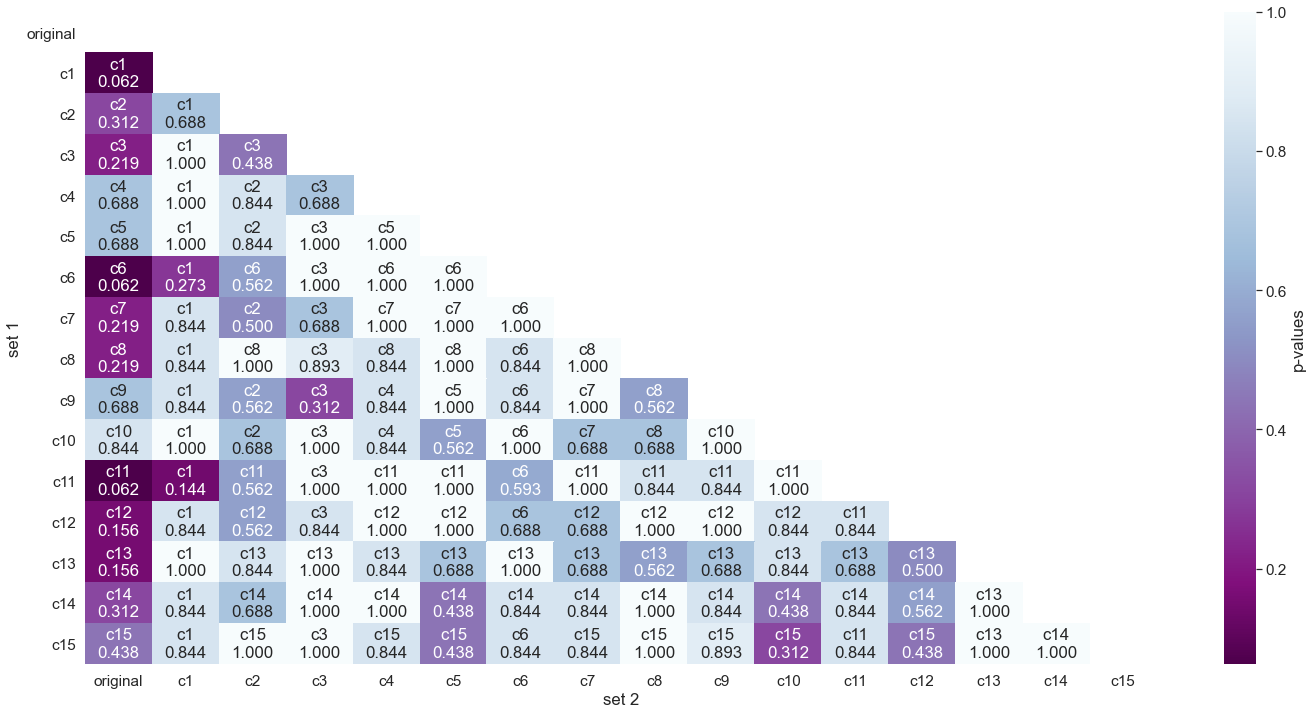

In [56]:
# Generate heatmap of p-values with winners

create_heatmap_with_winners(broad_wilcoxon_df, 'Heatmap of p-values | Wilcoxon test', 
                            'wilcoxon_heatmap_with_winners_broad')